# "Date-A-Scientist OKCupid"
> "This projects utilises machine learning algoritms in an attempt to predict the zodiac sign of OkCupid users. "
>
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/OKCupid_Logo.svg.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## Scoping
This project will analyse data from OkCupid as provided by Codecademy.  In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

The aim of the project is to use machine learning to answer questions about the data.  The data will be scoped, prepared and analysed before a machine learning model is applied.

### Project Goals
The aim of this project is to determine whether the zodiac sign of a user on OkCupid can be predicted using other information they have provided in their profile. Zodiac signs have been identified as an important attribute in the dating world, and as a portion of profiles do not provide this information, it would be useful for OkCupid to predict a zodiac sign to increase the likelihood of successful matches.

### Data
The data is included within profiles.csv, which has been provided by Codecademy.com.  The columns each contain answers to a multiple choice question or a short-essay style question, with each row representing an OkCupid user/profile.   No. of rows and columns.
### Analysis
####### WRITE AT END

### Results and Evaluation
####### WRITE AT END

## Initial

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

### Loading the dataframe



In [2]:
okc = pd.read_csv(r'profiles.csv')
(okc.head(5))

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#print(okc.columns)
#print(okc.dtypes)
(okc.info())
print(f"Number of rows = {len(okc.age)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The data provided has the following columns, which provide multiple choice answers:

* **body_type** - categorical variable
* **diet** - categorical variable
* **drinks** - categorical variable
* **drugs** - categorical variable
* **education** - categorical variable
* **ethnicity** - categorical variable
* **height** - continuous variable
* **income** - continuous variable
* **job** - categorical variable
* **last_online** - date variable
* **offspring** - categorical variable
* **orientation** - categorical variable
* **pets** - categorical variable
* **religion** - categorical variable
* **sex** - categorical variable
* **sign** - categorical variable
* **smokes** - categorical variable
* **speaks** - categorical variable
* **status** - categorical variable

And a set of open short-answer responses to :

* **essay0** - My self-summary
* **essay1** - What I’m doing with my life
***essay2** - I’m really good at…
* **essay3** - The first thing people usually notice about me…
* **essay4** - Favorite books, movies, show, music, and food
* **essay5** - The six things I could never do without
* **essay6** - I spend a lot of time thinking about…
* **essay7** - On a typical Friday night I am…
* **essay8** - The most private thing I am willing to admit
* **essay9** - You should message me if…

Changing the essay question columns into easier to understand variable names

In [4]:
okc.rename(columns={'essay0' : 'self_summary', 'essay1' : 'life_plans', 'essay2': 'good_at', 'essay3' : 'notice_about', 'essay4' : 'favourites', 'essay5' : 'do_without', 'essay6' : 'think_about', 'essay7' : 'friday', 'essay8' : 'private', 'essay9' : 'message'}, inplace=True)
(okc.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites',
       'do_without', 'think_about', 'friday', 'private', 'message',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
       'speaks', 'status'],
      dtype='object')

An initial brief look at the numerical data within the dataframe

In [5]:
(okc.describe())


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


## Exploring the data
### Zodiac sign data
First we will take a look at the zodiac sign data within the dataframe.




In [6]:
okc.sign.nunique()

48

There appears to be 48 answers to the 'What is your zodiac sign?' question.
As we know there are only 12 possible signs, this data must be looked at more closely.


In [7]:
okc.sign.unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

The data contains information about how important a zodiac sign is to the user for a potential match.  Whilst this is interesting information, 48 different answers will make the analysis time-consuming, so the sign will be extracted into a new column.
'The signs are quantified with the importance of zodiac signs to an OkCupid user. Whilst this is interesting information, intially it is best to remove this data and place the cleaned zodiac sign in a new column. Creating a new column means the sign importance data is retained for future use, if required.

In [8]:
okc['sign_clean']= okc.sign.str.split(' ').str[0]
okc.sign_clean.nunique()

12

The 12 unique zodiac signs are now correctly labelled in the okc.sign_clean column.
The below plot shows the amount of each zodiac sign.  The data appears fairly balanced, with capricorn representing slightly less of the users.

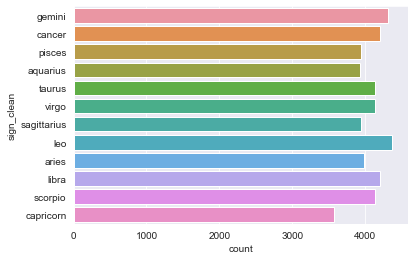

In [9]:
sns.countplot(data=okc, y='sign_clean')
plt.show()

## Continuous variables

Now we have looked at the zodiac sign data, let's explore the data that will be used to predict zodiac signs.

### Age range



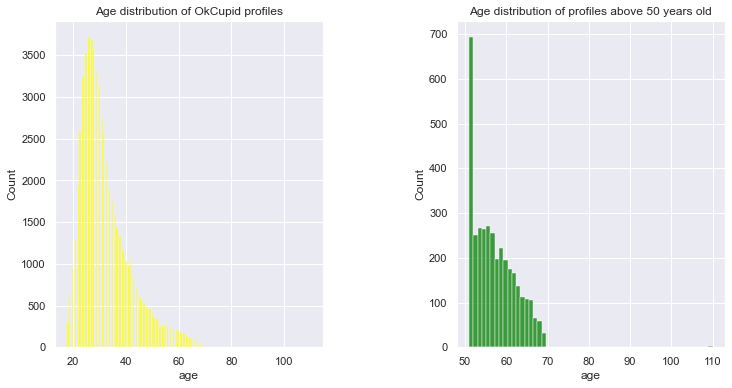

In [10]:
sns.set_style('darkgrid')
sns.set_context('notebook')
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(12,6))
plt.subplots_adjust(wspace=0.5)
ax1 = sns.histplot(okc.age, color='yellow', ax=ax1)
ax1.set_title('Age distribution of OkCupid profiles')
ax2 = sns.histplot(okc.age[okc.age > 50], color='green', ax=ax2)
ax2.set_title('Age distribution of profiles above 50 years old')
plt.show()

In [11]:
print(f'Mean age: {round(okc.age.mean(), 2)} ')
print(f'90th percentile: {okc.age.quantile(0.9)}')
print(f'Maximum age: {okc.age.max()} ')
print(f'Minimum age: {okc.age.min()} ')

Mean age: 32.34 
90th percentile: 46.0
Maximum age: 110 
Minimum age: 18 


The mean age of users is 32 years old, with 90% of the data lying below 46 years. The maximum age is 110 years old, which is either impressive, someone didn't want to disclose their age, or is an error.  This outlier causes the already left-skewed data to be further skewed.  Therefore, the two outliers, at 109 and 110 are best removed in order to minimise their effect on the total distribution of the data, and this the statistical analysis.

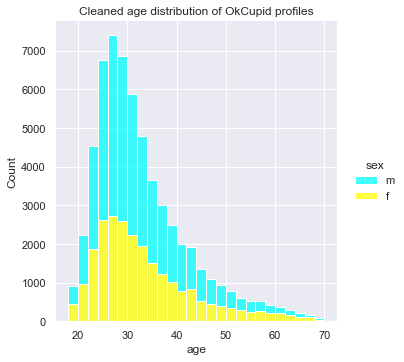

In [12]:
okc = okc[okc.age < 75]
sns.displot(data=okc, x="age", hue="sex", multiple = "stack", palette=['cyan', 'yellow'], kind='hist', binwidth=2)
plt.title('Cleaned age distribution of OkCupid profiles')
plt.show()


The plot shows that the age distribution for males and females is very similar - but also indicates that more males use dating applications

### Height

In [13]:
#collapse-output
print(okc.height.value_counts())


70.0    6074
68.0    5449
67.0    5353
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      19
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: height, dtype: int64


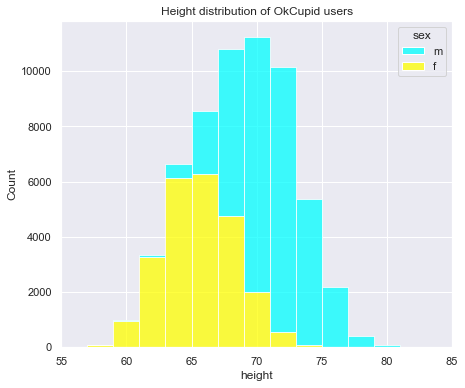

In [14]:
fig, (ax1) = plt.subplots(figsize=(7, 6))
sns.histplot(data=okc, x="height", hue="sex", binwidth=2, multiple = "stack", palette=['cyan', 'yellow'], ax=ax1)
ax1.set_xlim(55, 85)
plt.title('Height distribution of OkCupid users')
plt.show()

In [15]:
print(f'Minimum female height: {okc.height[okc.sex == "f"].min()} inches')
print(f'Minimum male height: {okc.height[okc.sex == "m"].min()} inches')
print(f'Maximum female height: {okc.height[okc.sex == "f"].max()} inches')
print(f'Maximum female height: {okc.height[okc.sex == "m"].max()} inches')
print(f'Average female height: {round(okc.height[okc.sex == "f"].mean(),2)} inches')
print(f'Average male height: {round(okc.height[okc.sex == "m"].mean(),2)} inches')

Minimum female height: 4.0 inches
Minimum male height: 1.0 inches
Maximum female height: 95.0 inches
Maximum female height: 95.0 inches
Average female height: 65.1 inches
Average male height: 70.44 inches


The minimum heights listed are 4 inches and 1 inches for females and males, respectively. We can assume that people did not want to list their height.  As heights for both males and females are normally distributed the small values will be left in - perhaps a certain zodiac sign prefers not to disclose their height.
The average height for females is 65 inches, or 5ft 5in and the average height for males is  5ft 10.5in.

### Income

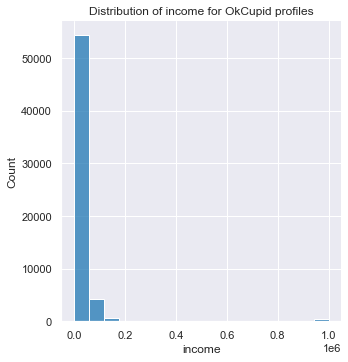

In [16]:
sns.displot(okc.income)
plt.title('Distribution of income for OkCupid profiles')
plt.show()

In [17]:

okc_no_income =(okc.income == -1).value_counts()
percent_no_income = (okc_no_income[1] / (okc_no_income[0] + okc_no_income[1])) * 100

print(okc_no_income)
print(percent_no_income)

True     48440
False    11504
Name: income, dtype: int64
80.80875483784867



It appears that most people, 81 %, prefer not to disclose their income in their dating profile.  This could be for several reasons such as it is often seen as crass to discuss income, or that people do not want money to be a factor in choosing a date. Given this lack of information, income will not be considered when applying models to the data.

## Discrete variables
Now we have looked at the continuous variables above, the next section will discuss the discrete variables, which make up the majority of the data.

### Sex
The gender distribution of the OkCupid profiles has been looked at earlier, and shows that there is a larger proportion of males to females.

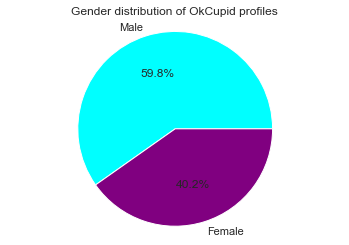

In [18]:

plt.pie(okc.sex.value_counts(), labels=['Male', 'Female'], colors=['cyan', 'purple'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Gender distribution of OkCupid profiles')
plt.show()



In [19]:
#function for plotting countplots to investigate the variables
def plotting_tool(df, x, width, height):
    plt.figure(figsize=[width, height])
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    for i in range(len(x)):
            plt.subplot(1, len(x), i+1)
            sns.countplot(data=df, y=x[i])
            plt.title(f'{x[i]}')
            plt.ylabel('')


### Diet and body



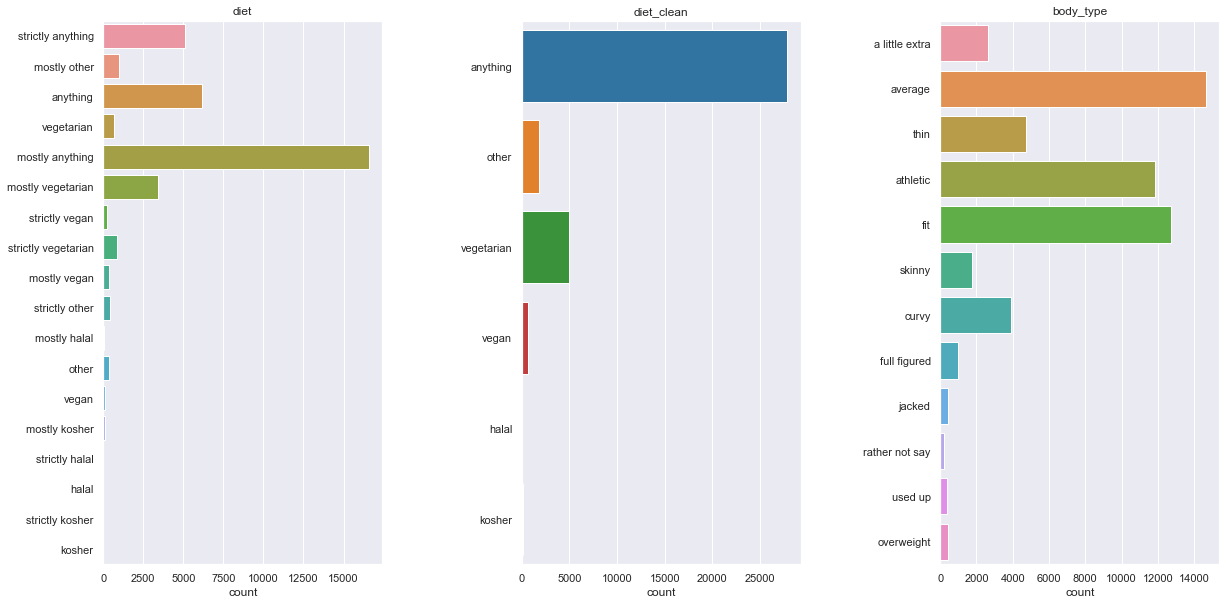

In [16]:
#Cleaning the data to remove the qualifying information
okc['diet_clean'] = okc.diet.str.split(' ').str[-1]
#print(okc.diet_clean)

diet_body = ['diet', 'diet_clean', 'body_type']
plotting_tool(okc, diet_body, 20, 10)

### Lifestyle choices:
 - Does a users smoking, drinking, drug and dietary habits predict their zodiac sign?


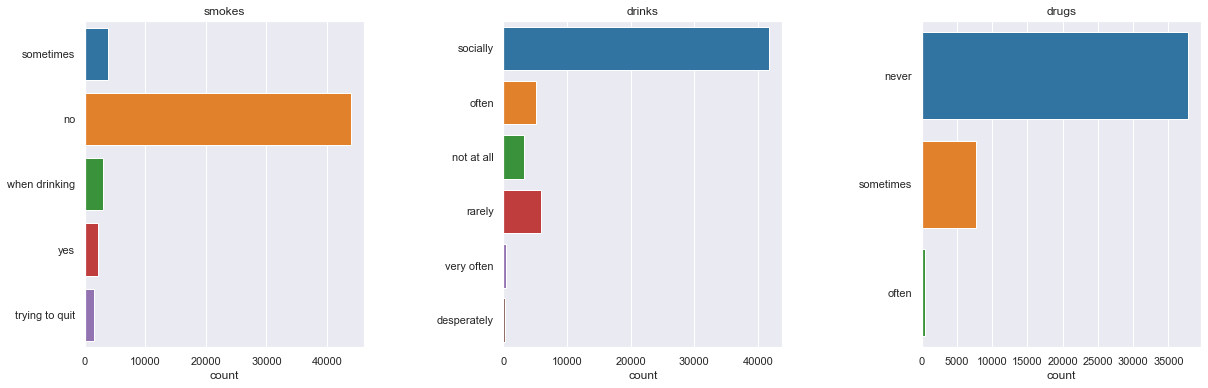

In [17]:
lifestyle_choices = ['smokes', 'drinks', 'drugs']
plotting_tool(okc, lifestyle_choices, 20, 6)

In [18]:
non_smoker = (okc.smokes == 'no').value_counts()
smoke_percent = round((non_smoker[1] / (non_smoker[1] + non_smoker[0])) * 100, 2)
social_drinker = (okc.drinks == 'socially').value_counts()
drinker_percent = round((social_drinker[1] / (social_drinker[1] + social_drinker[0])) * 100, 2)
uses_drugs = (okc.drugs == 'never').value_counts()
drugs_percent = round((uses_drugs[1] / (uses_drugs[1] + uses_drugs[0])) * 100, 2)
print(drinker_percent)
print(social_drinker)

69.7
True     41780
False    18164
Name: drinks, dtype: int64


### Education and employment


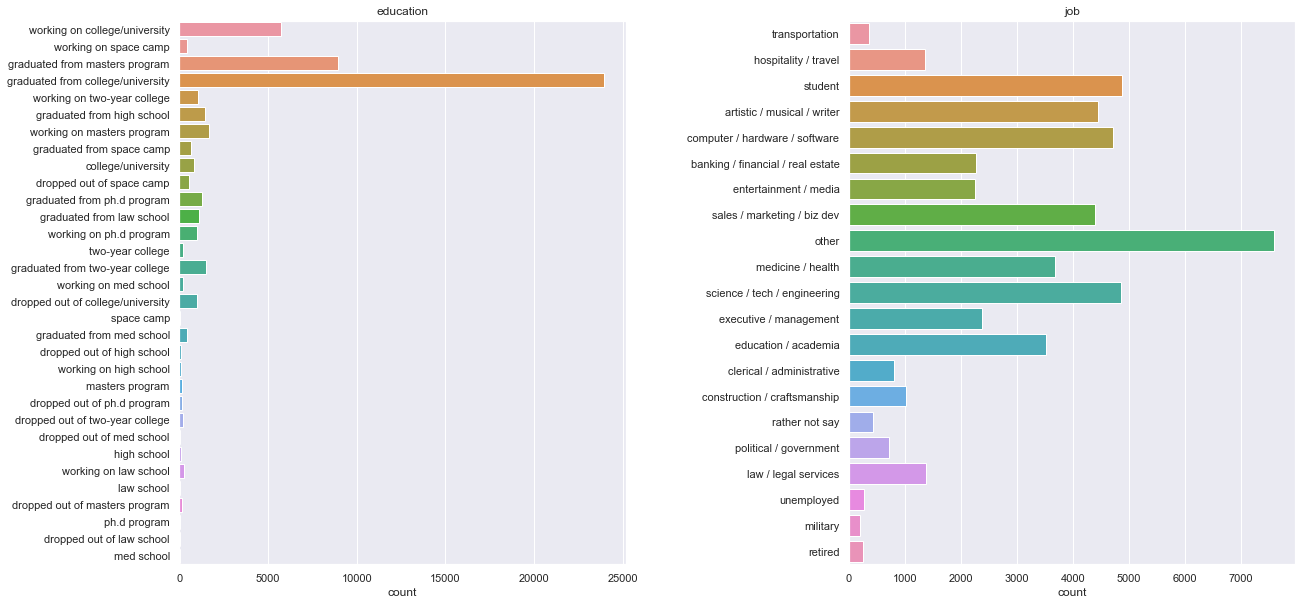

In [19]:
attrib2=['education', 'job']
plotting_tool(okc, attrib2, 20, 10)

## Pets and relationship status

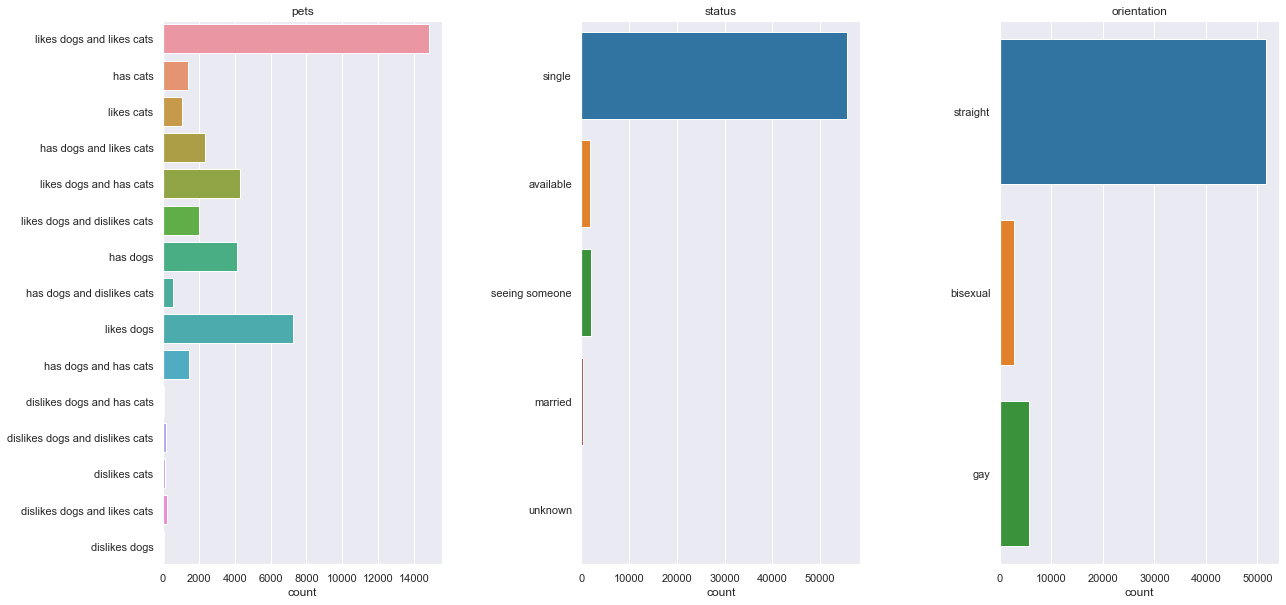

In [20]:
pets_status = ['pets', 'status', 'orientation']
plotting_tool(okc, pets_status, 20, 10)

In [21]:
single = (okc.status == 'single').value_counts()
single_percent = round((single[1] / (single[1] + single[0])) * 100, 2)
print(single_percent)

92.91


## Religion

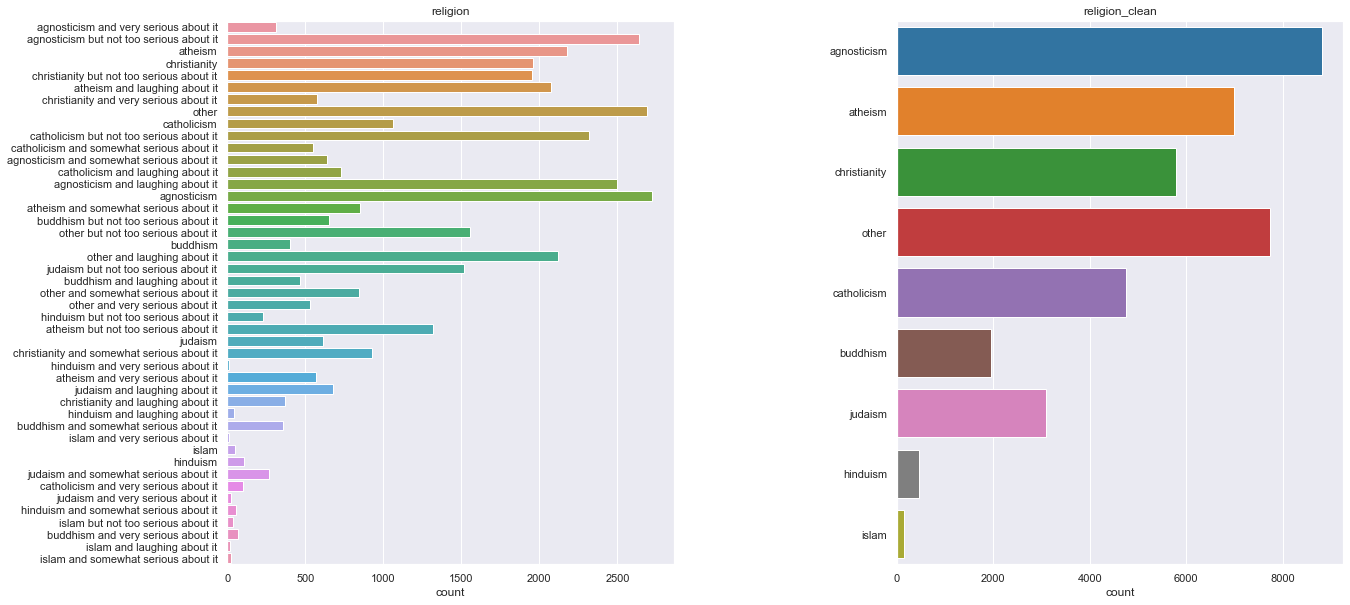

In [22]:
#Cleaning the data to remove the qualifying information
okc['religion_clean'] = okc.religion.str.split(' ').str[0]
#print(okc.religion_clean)

reli = ['religion', 'religion_clean']
plotting_tool(okc, reli, 20, 10)

## Data preparation

### Preprocessing

In [23]:
columns_for_model = ['body_type', 'diet_clean', 'job', 'pets', 'religion_clean', 'orientation', 'sex', 'sign_clean']
print(len(okc.diet_clean))

59944


In [24]:
#number of null values in each column
nulls = (okc[columns_for_model].isnull().sum(axis = 0))
print(nulls)

nulls_values = []

for null in range(len(nulls)):
    nulls_values.append(nulls[null])
print(nulls_values)

body_type          5295
diet_clean        24394
job                8197
pets              19919
religion_clean    20225
orientation           0
sex                   0
sign_clean        11055
dtype: int64
[5295, 24394, 8197, 19919, 20225, 0, 0, 11055]


In [25]:
#making df of values
null_comb = list(zip(columns_for_model, nulls_values))
print(null_comb)

null_df  = pd.DataFrame(null_comb, columns=['Column', 'NaN'])


null_df['% NaN values'] = round((null_df.NaN / (len(okc))) *100, 2)
display(null_df)

[('body_type', 5295), ('diet_clean', 24394), ('job', 8197), ('pets', 19919), ('religion_clean', 20225), ('orientation', 0), ('sex', 0), ('sign_clean', 11055)]


,Column,NaN,% NaN values
0,body_type,5295,8.83
1,diet_clean,24394,40.69
2,job,8197,13.67
3,pets,19919,33.23
4,religion_clean,20225,33.74
5,orientation,0,0.00
6,sex,0,0.00
7,sign_clean,11055,18.44


In [26]:
#need to drop some data that has NaN values.
#as we are looking at zodiac signs, the NaN values in the sign_clean column are best removed

In [27]:
columns_to_remove_nan = ['sign_clean', 'body_type', 'job']
for n in columns_to_remove_nan:
    print(n)

sign_clean
body_type
job


In [28]:
def remove_nulls(df, cols, df_columns, df2):
    remaining_null = []
    for n in cols:
        df = df.dropna(subset=[n])
        drop_null = df[df_columns].isnull().sum(axis = 0)
        for value in drop_null:
            remaining_null.append(value)
        df2[f'NaN after {n} null drop'] = pd.Series(remaining_null)
        remaining_null = []

    return df, df2




In [29]:
okc_drop, null_df = (remove_nulls(okc, columns_to_remove_nan, columns_for_model, null_df))


In [30]:
print(len(okc_drop))
display(null_df)

40755


,Column,NaN,% NaN values,NaN after sign_clean null drop,NaN after body_type null drop,NaN after job null drop
0,body_type,5295,8.83,3938,0,0
1,diet_clean,24394,40.69,18770,16005,13995
2,job,8197,13.67,4961,4196,0
3,pets,19919,33.23,13717,12389,10446
4,religion_clean,20225,33.74,14130,12553,10488
5,orientation,0,0.00,0,0,0
6,sex,0,0.00,0,0,0
7,sign_clean,11055,18.44,0,0,0


In [31]:
#If null values were removed from diet_clean, religion_clean and pets then a large chunk of data would be removed.
print(okc_drop.diet_clean.unique())
print(okc_drop.pets.unique())
print(okc_drop.religion_clean.unique())

#replace the nan values with 'unknown' as perhaps certain zodiac signs have no opinion on pets, dietary or religious choices

okc_drop =okc_drop.fillna('unknown')

['anything' 'other' 'vegetarian' nan 'vegan' 'halal' 'kosher']
['likes dogs and likes cats' 'likes cats' 'likes dogs and has cats' nan
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'has dogs and likes cats' 'likes dogs' 'has cats' 'has dogs and has cats'
 'dislikes dogs and has cats' 'dislikes dogs and dislikes cats'
 'dislikes cats' 'dislikes dogs and likes cats' 'dislikes dogs']
['agnosticism' nan 'atheism' 'christianity' 'catholicism' 'other'
 'buddhism' 'hinduism' 'judaism' 'islam']


In [32]:
print(okc_drop.diet_clean.unique())
print(okc_drop.pets.unique())
print(okc_drop.religion_clean.unique())

['anything' 'other' 'vegetarian' 'unknown' 'vegan' 'halal' 'kosher']
['likes dogs and likes cats' 'likes cats' 'likes dogs and has cats'
 'unknown' 'likes dogs and dislikes cats' 'has dogs'
 'has dogs and dislikes cats' 'has dogs and likes cats' 'likes dogs'
 'has cats' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']
['agnosticism' 'unknown' 'atheism' 'christianity' 'catholicism' 'other'
 'buddhism' 'hinduism' 'judaism' 'islam']


In [33]:
print(okc_drop[columns_for_model].isnull().sum(axis = 0))
okc_model_df = okc_drop[['body_type', 'diet_clean', 'job', 'pets', 'religion_clean', 'orientation', 'sex', 'sign_clean']]

body_type         0
diet_clean        0
job               0
pets              0
religion_clean    0
orientation       0
sex               0
sign_clean        0
dtype: int64


### Dummy variables

The categorical data is ordinal, in that it does not follow a particular ranking or order. Therefore, in order to prepare this data for use in the models, features will be converted into dummies.

In [34]:
features = ['body_type', 'diet_clean', 'job', 'pets', 'religion_clean', 'orientation', 'sex']

okc_dummies = pd.get_dummies(data=okc_model_df, columns=features)
display(okc_dummies)
print(okc_dummies.info())

,sign_clean,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,religion_clean_hinduism,religion_clean_islam,religion_clean_judaism,religion_clean_other,religion_clean_unknown,orientation_bisexual,orientation_gay,orientation_straight,sex_f,sex_m
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,pisces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,aquarius,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59936,virgo,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
59942,leo,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
59943,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
59944,leo,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40755 entries, 0 to 59945
Data columns (total 72 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   sign_clean                             40755 non-null  object
 1   body_type_a little extra               40755 non-null  uint8 
 2   body_type_athletic                     40755 non-null  uint8 
 3   body_type_average                      40755 non-null  uint8 
 4   body_type_curvy                        40755 non-null  uint8 
 5   body_type_fit                          40755 non-null  uint8 
 6   body_type_full figured                 40755 non-null  uint8 
 7   body_type_jacked                       40755 non-null  uint8 
 8   body_type_overweight                   40755 non-null  uint8 
 9   body_type_rather not say               40755 non-null  uint8 
 10  body_type_skinny                       40755 non-null  uint8 
 11  body_type_thin 

### Labels
Converting the zodiac signs to a numerical value for use in the models


okc_dummies['sign_labels'] = okc_dummies.sign_clean.astype('category').cat.codes
labels = okc_dummies[['sign_labels']]
labels_array = labels.squeeze().ravel()
print(labels_array)

### Splitting the data


In [35]:
#import library to split the data for testing and training

from sklearn.model_selection import train_test_split

#The data will be split 80% for training the model and 20% for validating the model

X_data = okc_dummies.iloc[:, 1:-1]
y_data = okc_dummies.iloc[:, 0:1]


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#convert the y data into an array
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

(32604, 70)
(32604, 1)
(8151, 70)
(8151, 1)


## Models

### Logistic Regression


In [36]:
#import library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [37]:
#Logistic regression model with the multi_class='multinomial' argument

logres_model = LogisticRegression(max_iter=4000)
logres_model.fit(X_train, y_train)
logres_model.predict(X_test)
logres_test_score = logres_model.score(X_test, y_test)

In [38]:
print(f'The model performed poorly in predicting zodiac signs, with a success rate of only {round(logres_test_score * 100, 2)} %')
labels_chart = logres_model.classes_


The model performed poorly in predicting zodiac signs, with a success rate of only 8.5 %


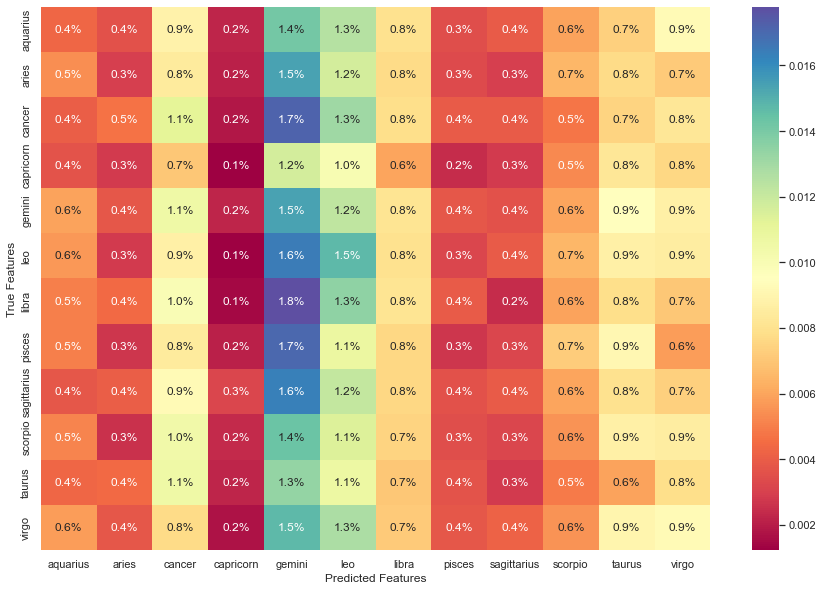

In [39]:
#confusion matrix
conf_mat = confusion_matrix(y_test, logres_model.predict(X_test))
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt = '.1%', cmap = 'Spectral', xticklabels=labels_chart, yticklabels=labels_chart)
plt.xlabel('Predicted Features')
plt.ylabel('True Features')
plt.show()


Logistic regression is generally used for continuous variable predictions not classification, so may not be the best model to predict a users zodiac sign. Therefore further models will be utilised.

### K Nearest Neighbour

In [40]:
from sklearn.neighbors import KNeighborsClassifier
#the default number of neighbors is 5. As there are 12 zodiac signs, the model will initially be set to 12
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X_train, y_train)
predict_knn = knn_model.predict(X_test)
success_rate = knn_model.score(X_test, y_test)
print(success_rate)

0.08759661391240339


In [41]:
print(accuracy_score(y_test, predict_knn))
print(recall_score(y_test, predict_knn, average='weighted'))
print(precision_score(y_test, predict_knn, average='weighted'))
print(f1_score(y_test, predict_knn, average='weighted'))

0.08759661391240339
0.08759661391240339
0.08669126808013776
0.0842717921981329


### Decision Tree

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
forest_model = RandomForestClassifier(n_estimators=20)
forest_model.fit(X_train, y_train)
forest_model.predict(X_test)
print(forest_model.score(X_test, y_test))
print(forest_model.feature_importances_)

0.08735124524598209
[0.01607039 0.02008834 0.02910372 0.01205035 0.0175794  0.0082154
 0.00407284 0.00417951 0.00241875 0.0093714  0.02021308 0.00398401
 0.03095164 0.00081928 0.00103057 0.01197665 0.03154579 0.00583407
 0.02042834 0.01912311 0.01077212 0.00772868 0.01669942 0.00754726
 0.01656753 0.01545034 0.01539376 0.01282007 0.01095852 0.01835813
 0.00284585 0.02562546 0.00734807 0.00550831 0.0030539  0.01823558
 0.01796864 0.01930549 0.00514901 0.00359135 0.00149713 0.00077843
 0.00278787 0.00134235 0.00328306 0.01091292 0.01983345 0.00520942
 0.00986275 0.01788264 0.00774301 0.02563794 0.01578018 0.02001609
 0.03530387 0.0330011  0.02504869 0.02137397 0.01402765 0.0201083
 0.01860244 0.00479428 0.00144901 0.01543568 0.02236582 0.02741532
 0.01168888 0.01632144 0.02029262 0.06021955]


## NLP and Naive Bayes

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import ngrams
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lottes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lottes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lottes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
NB_df = okc[['sign_clean','self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites',
             'do_without', 'think_about', 'friday', 'private', 'message']].copy()

#remove null values

NB_df = NB_df.dropna(subset=['sign_clean','self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites',
                     'do_without', 'think_about', 'friday', 'private', 'message'])
print(NB_df.isnull().sum())
print(len(NB_df))

sign_clean      0
self_summary    0
life_plans      0
good_at         0
notice_about    0
favourites      0
do_without      0
think_about     0
friday          0
private         0
message         0
dtype: int64
26117


In [46]:
def regex_function(text):
    return re.sub('<.*?>|\\n+|http\S+|(?<=&)(.*?)(?=;)|,|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@', ' ', text)

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text)

In [47]:
essay_list = ['self_summary', 'life_plans', 'good_at', 'notice_about', 'favourites', 'do_without', 'think_about', 'friday', 'private', 'message']
for essay in essay_list:
    NB_df[essay] = NB_df[essay].apply(lambda x: regex_function(x))
    NB_df[essay] = NB_df[essay].apply(lambda x: remove_extra_whitespace(x))
    NB_df[essay] = NB_df[essay].str.lower()

In [48]:
display(NB_df.head(50))

,sign_clean,self_summary,life_plans,good_at,notice_about,favourites,do_without,think_about,friday,private,message
0,gemini,about me i would love to think that i was some...,currently working as an international agent fo...,making people laugh ranting about a good salti...,the way i look i am a six foot half asian half...,books absurdistan the republic of mice and men...,food water cell phone shelter,duality and humorous things,trying to find someone to hang out with i am d...,i am new to california and looking for someone...,you want to be swept off your feet you are tir...
5,taurus,i'm an australian living in san francisco but ...,building awesome stuff figuring out what's imp...,imagining random shit laughing at aforemention...,i have a big smile i also get asked if i'm wea...,books to kill a mockingbird lord of the rings ...,like everyone else i love my friends and famil...,what my contribution to the world is going to ...,out with my friends,i cried on my first day at school because a bi...,you're awesome
9,cancer,my names jake i'm a creative guy and i look fo...,i have an apartment i like to explore and chec...,i'm good at finding creative solutions to prob...,i'm short,i like some tv i love summer heights high and ...,music my guitar contrast good food my bike my ...,you should,send a message,and say hi,you can rock the bells
10,taurus,update i'm seeing someone so off the market i ...,i have three jobs i've been doing sound and li...,hugging kissing laughing motivating people mas...,my huge goofy smile,i'm constantly reading i read at what my frien...,family friends food women music reading,snowboarding food women goofy nerd stuff archi...,having dinner and drinks with friends and or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self este...
11,leo,i was born in wisconsin grew up in iowa and mo...,i'm currently the youngest member on an intern...,i'm really good at a little bit of everything ...,the way i dress some days it's hats other days...,books = yes avid reader moves = eternal sunshi...,guitar even if i don't play it all the time i'...,a little bit of everything but mostly social i...,hanging out with a small group of friends stay...,i'm picky when it comes to dating i know what ...,if you know who you are who you want where you...
16,pisces,i just moved to the bay area from austin tx or...,making music programming getting back into a f...,i'm from louisiana so cooking and eating are p...,"lately i keep getting asked ""are you with the ...",movies tv etc the big lebowski and other cohen...,in no particular order good food music the ou...,methodologies for practicing creative skills ...,i just moved here and am still getting to know...,i am in my 30's and still cannot grow a mustac...,you want to help me assemble ikea stuff and or...
17,aries,to sum myself in whole i have adventurous tend...,i'm currently studying and majoring in crimina...,hmm i know i can take a test rather well ohh a...,physically i've been told my eyes people usual...,i'm much more of a movie goer favorite actor e...,my cellphone eye liner food wallet jacket a go...,my next big vacation who knows maybe if i like...,working out at the gym sometimes watching a mo...,i could beat you at a game of hold em' try me ...,you're interested and you also thought ophelia...
18,libra,some of my favorite things riding my motorcycl...,enjoying it exploring limits looking for love,understanding appreciating i like getting a co...,blue eyes and a kind soul although i don't rea...,i like stories that are adventurous fun and en...,compassion love art my motorcycle stretching a...,i like thinking about ways to improve things i...,last friday i had dinner with my roommates and...,i have liked vampire novels ever since finding...,because i'll try to write back and it's hard t...
19,pisces,i relocated to san francisco half a year ago t...,i left my comfort zone far behind in europe an...,listening connecting emotionally a

In [49]:
no_list = list(range(0,12))
print(no_list)
zodiac_list = list(okc_model_df.sign_clean.unique())
print(zodiac_list)
map_dict = dict(zip(zodiac_list, no_list))
print(map_dict)

#mapping the signs to integers
NB_df['sign_int'] = NB_df.sign_clean.map(map_dict)
display(NB_df.head())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'sagittarius', 'leo', 'aries', 'libra', 'scorpio', 'virgo', 'capricorn']
{'gemini': 0, 'cancer': 1, 'pisces': 2, 'aquarius': 3, 'taurus': 4, 'sagittarius': 5, 'leo': 6, 'aries': 7, 'libra': 8, 'scorpio': 9, 'virgo': 10, 'capricorn': 11}


,sign_clean,self_summary,life_plans,good_at,notice_about,favourites,do_without,think_about,friday,private,message,sign_int
0,gemini,about me i would love to think that i was some...,currently working as an international agent fo...,making people laugh ranting about a good salti...,the way i look i am a six foot half asian half...,books absurdistan the republic of mice and men...,food water cell phone shelter,duality and humorous things,trying to find someone to hang out with i am d...,i am new to california and looking for someone...,you want to be swept off your feet you are tir...,0
5,taurus,i'm an australian living in san francisco but ...,building awesome stuff figuring out what's imp...,imagining random shit laughing at aforemention...,i have a big smile i also get asked if i'm wea...,books to kill a mockingbird lord of the rings ...,like everyone else i love my friends and famil...,what my contribution to the world is going to ...,out with my friends,i cried on my first day at school because a bi...,you're awesome,4
9,cancer,my names jake i'm a creative guy and i look fo...,i have an apartment i like to explore and chec...,i'm good at finding creative solutions to prob...,i'm short,i like some tv i love summer heights high and ...,music my guitar contrast good food my bike my ...,you should,send a message,and say hi,you can rock the bells,1
10,taurus,update i'm seeing someone so off the market i ...,i have three jobs i've been doing sound and li...,hugging kissing laughing motivating people mas...,my huge goofy smile,i'm constantly reading i read at what my frien...,family friends food women music reading,snowboarding food women goofy nerd stuff archi...,having dinner and drinks with friends and or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self este...,4
11,leo,i was born in wisconsin grew up in iowa and mo...,i'm currently the youngest member on an intern...,i'm really good at a little bit of everything ...,the way i dress some days it's hats other days...,books = yes avid reader moves = eternal sunshi...,guitar even if i don't play it all the time i'...,a little bit of everything but mostly social i...,hanging out with a small group of friends stay...,i'm picky when it comes to dating i know what ...,if you know who you are who you want where you...,6


In [50]:
#creating a column for use in model
NB_df['corpus'] = NB_df[essay_list].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [51]:
#saving the NB_df to check corpus is correct
NB_df.to_csv('NB_df1.csv')

In [52]:
#Function for preparing the data for use in Naive Bayes analysis

def NLP_processing(text):

    tokenized = word_tokenize(text)

    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(token)for token in tokenized]

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in stemmed]

    stop_words = set(stopwords.words('english'))
    output = [x for x in lemmatized if x not in stop_words]

    output = ' '.join(output)

    return output

In [53]:
NB_df.corpus = NB_df.corpus.map(lambda x: NLP_processing(x))

In [54]:
#split the data into training sets before vectorizing - avoid training data leaking into test data

corpus = NB_df.corpus
labels = NB_df.sign_int

NB_corpus_train, NB_corpus_test, NB_labels_train, NB_labels_test = train_test_split(corpus, labels, test_size=0.25, random_state=100)

print(NB_corpus_train.shape)
print(NB_labels_train.shape)
print(NB_corpus_test.shape)
print(NB_labels_test.shape)



(19587,)
(19587,)
(6530,)
(6530,)


In [55]:
#vectorising

counter = CountVectorizer()
counter.fit(NB_corpus_train)

#print(corpus_train)



CountVectorizer()

In [56]:
NB_train_counts = counter.transform(NB_corpus_train)
NB_test_counts = counter.transform(NB_corpus_test)
#NB_train_counts.toarray()
#NB_test_counts.toarray()


In [57]:
NB_train_counts
NB_test_counts

<6530x75791 sparse matrix of type '<class 'numpy.int64'>'
	with 1345001 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
classifier = MultinomialNB()
classifier.fit(NB_train_counts, NB_labels_train)
print(classifier.score(NB_test_counts, NB_labels_test))


0.0888208269525268


In [60]:
predictions = classifier.predict(NB_test_counts)

print(labels.value_counts(normalize=True))

matrix = confusion_matrix(NB_labels_test, predictions)

6     0.088410
0     0.088027
8     0.087989
1     0.086381
10    0.085117
4     0.083853
9     0.083394
7     0.083011
5     0.081977
2     0.079910
3     0.079488
11    0.072443
Name: sign_int, dtype: float64


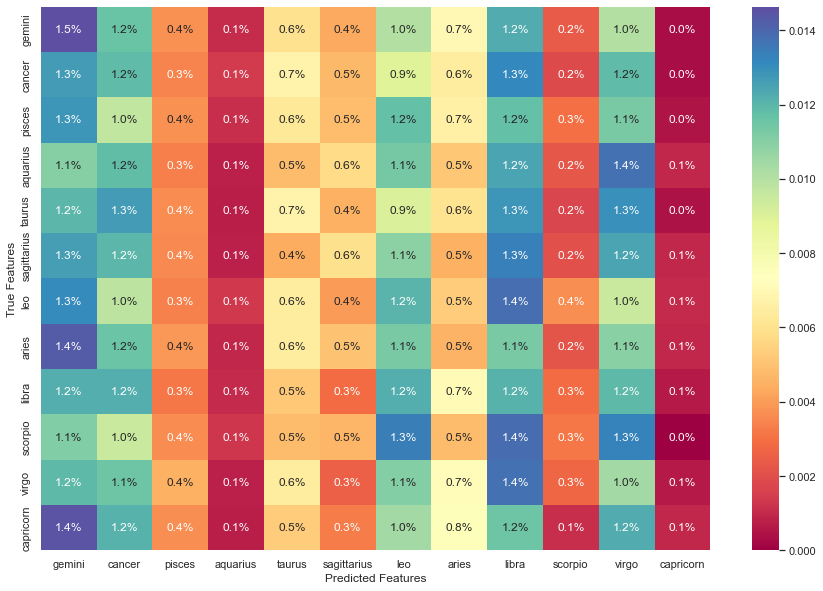

In [61]:
conf_mat2 = confusion_matrix(NB_labels_test, classifier.predict(NB_test_counts), normalize='true')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat2/np.sum(conf_mat2), annot=True, fmt = '.1%', cmap = 'Spectral', xticklabels=zodiac_list, yticklabels=zodiac_list)
plt.xlabel('Predicted Features')
plt.ylabel('True Features')
plt.show()



